# Instituto Tecnológico de Durango 
## Inteligencia Artificial
## Practica 2 Titanic
### Juan Manuel Saracho Figueroa 

### Parte 1 

#### Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?
**Respuesta: ¿Qué tipo de boleto tenía el pasajero? ¿Sexo?** 

In [5]:
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

In [6]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


### ¿Faltan valores en el conjunto de datos?
**Respuesta: Faltan los valores Embarked, Cabin y Age**

### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [8]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [9]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [10]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [11]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


### ¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?
**Respuesta: La media de la edad de las demas personas / (training["Age"])**

## Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

In [12]:
y_target = training["Survived"].values

In [13]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
X_input = training[list(columns)].values

In [14]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_input, y_target)

In [15]:
clf_train.score(X_input,y_target)

0.8163934426229508

## Paso 6: Visualizar el árbol

In [16]:
from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

C:\Users\juanm\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [17]:
!dot -Tpng titanic.dot -o titanic.png

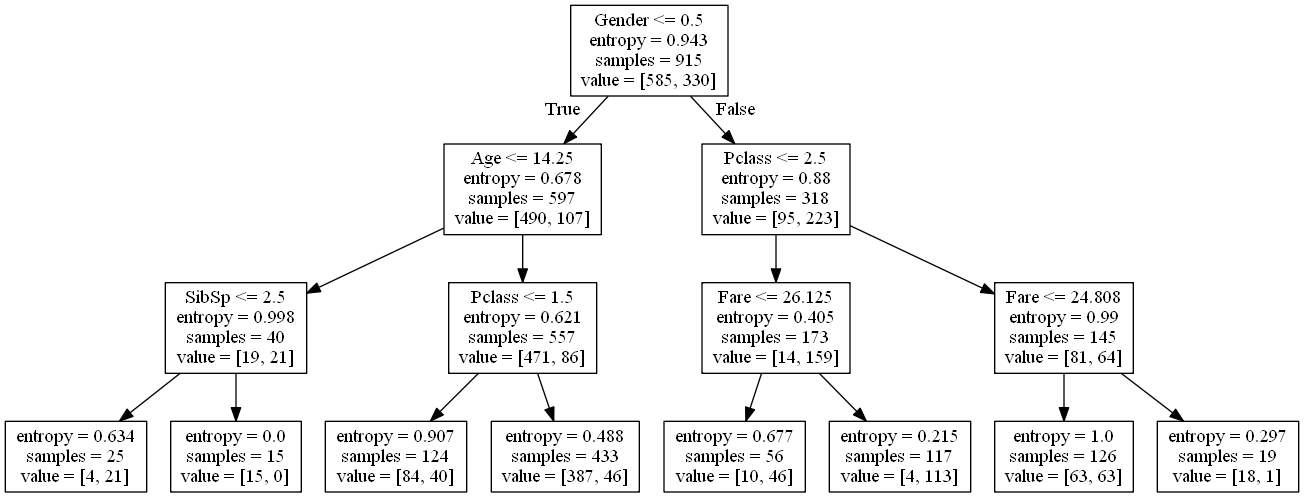

In [18]:
from IPython.display import Image
Image("titanic.png")

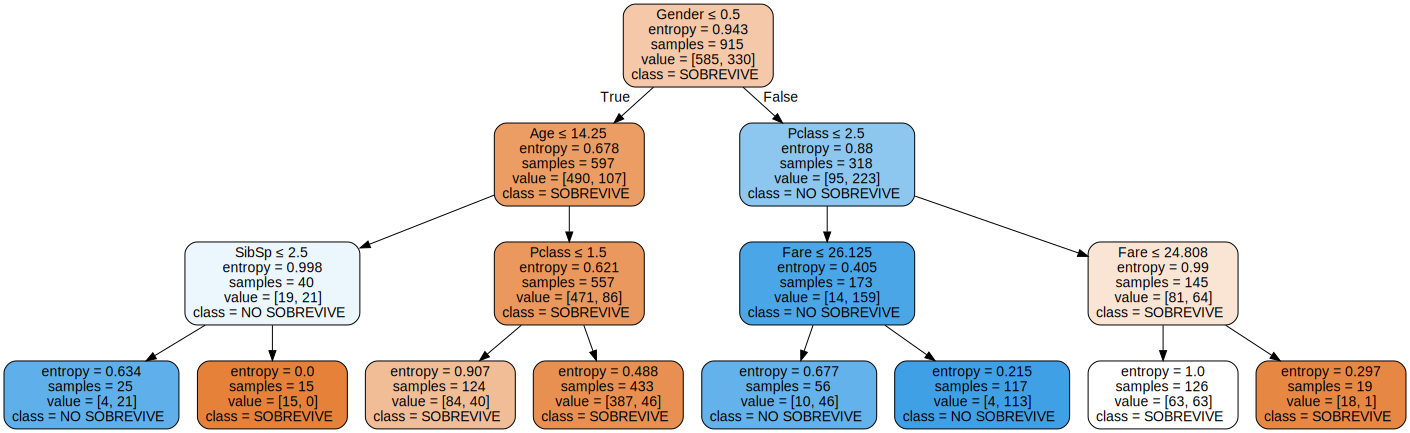

In [19]:
clasificacion=['SOBREVIVE','NO SOBREVIVE']
import sklearn
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("titanicColor", format='png')
graph

### ¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

**Respuesta: El grupo con mayor cantidad de sobrevivientes fue el de mujeres de más de 14 años con una boleto de clase 1.5. El grupo con mayor cantidad de victimas fatales fue el de hombres de más de 26 años con un boleto de clase 2.5** 

## Parte 2: Aplicar el modelo del árbol de decisiones

#### Paso 1: Importar y elaborar los datos


In [18]:
testing = pd.read_csv("titanic-test.csv")

In [26]:
testing

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.00000,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.00000,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.00000,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.00000,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
388,1304,0,3,"Thomas, Mr. Charles P",0,29.56569,1,0,2621,6.4375,NaN,C
389,1305,0,3,"Paulner, Mr. Uscher",0,29.56569,0,0,3411,8.7125,NaN,C
390,1306,1,1,"Thorne, Mrs. Gertrude Maybelle",1,29.56569,0,0,PC 17585,79.2000,NaN,C
391,1307,0,3,"Holthen, Mr. Johan Martin",0,28.00000,0,0,C 4001,22.5250,NaN,S


### ¿Cuántos registros hay en el conjunto de datos?

**Respuesta: 393 registros**

### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta Age: 86 Cabin: 300**

In [19]:
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [20]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

#### Paso 2: Etiquetar el conjunto de datos de prueba

In [21]:
X_input = testing[list(columns)].values

In [22]:
target_labels = clf_train.predict(X_input)
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

In [23]:
import numpy as np
all_data = pd.read_csv("titanic_all.csv")
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

## Parte 3: Evaluar el modelo del árbol de decisiones

### Paso 1: Importar los datos

In [43]:
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])

### ¿Cuántos registros hay en el conjunto de datos?

**Respuesta: 393**

### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**Respuesta: Faltan 263 en Age**

### Paso 2: Explicar los datos.

In [45]:
#code cell 4
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [46]:
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [47]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [48]:
from sklearn.model_selection import train_test_split
X = all_data[list(columns)].values
y = all_data["Survived"].values
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [49]:
type(X_train)

numpy.ndarray

In [50]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_train, y_train)

In [51]:
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


## Tarea 
### Eliminar las observaciones con valores de edad faltantes.

In [6]:
#create a pandas dataframe called "training" from the titanic-train.csv file
training2 = pd.read_csv("titanic-train.csv") 
training2["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
training2

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
910,911,0,3,"Baccos, Mr. Raffull",0,20.0,0,0,2679,7.2250,NaN,C
911,912,0,1,"Smith, Mr. Richard William",0,NaN,0,0,113056,26.0000,A19,S
912,913,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
913,914,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0000,NaN,S


In [8]:
training2.dropna(subset=['Age'], inplace=True)
training2

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.0,0,0,211535,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
907,908,0,2,"Fillbrook, Mr. Joseph Charles",0,18.0,0,0,C.A. 15185,10.5000,NaN,S
909,910,0,3,"Crease, Mr. Ernest James",0,19.0,0,0,S.P. 3464,8.1583,NaN,S
910,911,0,3,"Baccos, Mr. Raffull",0,20.0,0,0,2679,7.2250,NaN,C
912,913,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S


In [10]:
y_target = training2["Survived"].values
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
X_input = training2[list(columns)].values
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_input, y_target)
clf_train.score(X_input,y_target)

0.8252032520325203

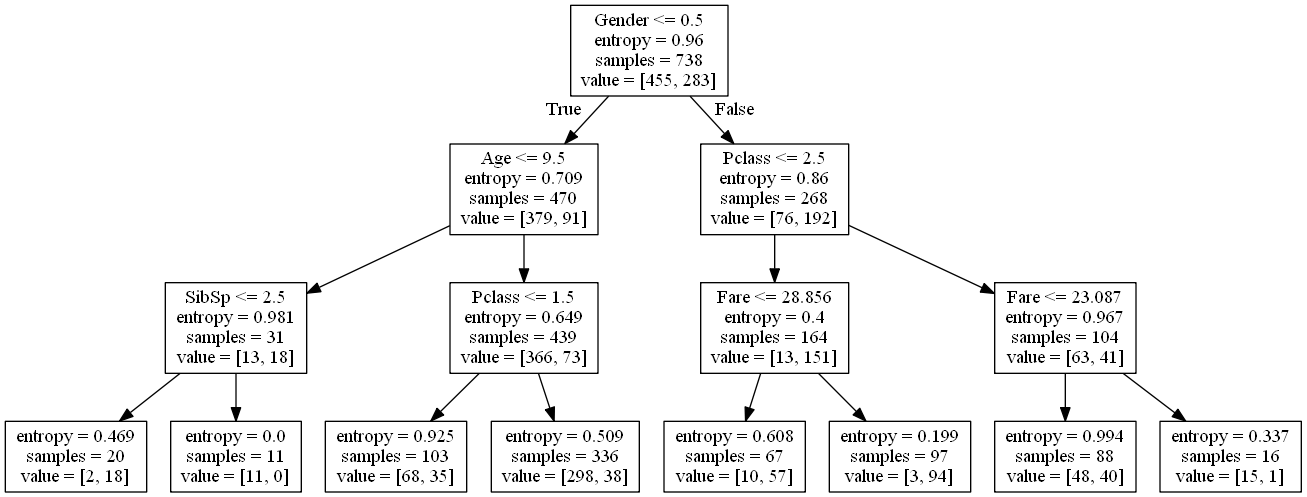

In [13]:
from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)
!dot -Tpng titanic.dot -o titanic2.png
from IPython.display import Image
Image("titanic2.png")

In [ ]:
clasificacion=['SOBREVIVE','NO SOBREVIVE']
import sklearn
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("titanicColor", format='png')
graph

# Reflexion 
#### Este tipo de algoritmos resulta muy útil a la hora de analizar una gran cantidad de datos, como se pudo observar en la en los árboles, se obtienen mejores resultados cuando nos deshacemos de datos que no estan completos o que se encuentran nulos. Es por eso que antes de analizar cualquier dataset revisar los datos y corregir cualquier inconveniente que se encuentre dentro de ellos. Por ellos podemos decir que eliminar los datos si fue efectivo.

#### Los porcentajes fueron: 75% sin eliminar valor nulos y 82% eliminando los valores nulos.